In [114]:
import numpy as np
import importlib
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection
import QrModels

importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)
importlib.reload(QrModels)

<module 'QrModels' from 'D:\\netSVG\\QrModels.py'>

In [115]:
import os
dataset_config = config.DatasetConfig(scenario="functional", n_instance=1000)

assert(dataset_config.scenario == "functional" 
      )
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/functional already exists replacing files in this notebook


In [116]:
X_test,Y_test = dataset.get_functional_test_data()

In [117]:
X_train,Y_train = dataset.get_functional_train_data()

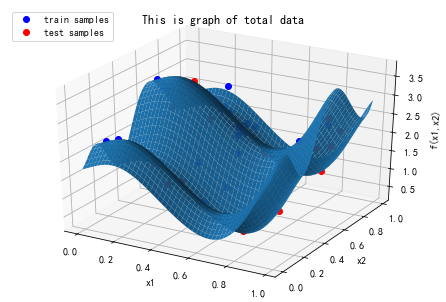

In [118]:
exp_config = config.Config(
    model=config.ModelConfig(activation="elu", lr_gen=0.0001, dec_gen=0, lr_disc=0.001, optim_gen="Adam", 
                             optim_disc="Adam", z_input_size=1),
    training=config.TrainingConfig(n_epochs=2000, batch_size=100, n_samples=100),
    dataset=dataset_config,
    run=config.RunConfig(save_fig=1)
)

plotting.plot_front(X_train, Y_train, X_test, Y_test, exp_config, fig_dir)

In [119]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[-1.08468  0.09633]
normal coefficient: 
2.44233
Standardized regression coefficient: 
[-0.36156  0.0381 ]
normal coefficient: 
-0.0


In [120]:
imp = sample.get_importance(coef,Y_train)

y std:
0.71508
The importance for every dimension:
[0.50562 0.05328]


In [121]:
length = sample.get_sample_length(X_train,imp)

Euclidean distance in x domain：
[[0.    0.017 0.337 0.403 0.148 0.177 0.384 0.013 0.151 0.04  0.285 0.51
  0.227 0.341 0.079 0.219 0.038 0.313 0.613 0.111 0.055 0.012 0.195 0.173
  0.277 0.192 0.246 0.225 0.396 0.118]
 [0.017 0.    0.361 0.574 0.082 0.271 0.527 0.058 0.173 0.055 0.409 0.649
  0.328 0.501 0.165 0.314 0.106 0.471 0.725 0.109 0.131 0.04  0.115 0.271
  0.37  0.311 0.369 0.252 0.548 0.143]
 [0.337 0.361 0.    0.98  0.754 0.842 1.14  0.321 0.936 0.145 0.993 1.445
  0.95  0.412 0.502 0.956 0.378 0.794 1.732 0.076 0.448 0.465 0.832 0.81
  1.106 0.273 0.889 1.108 1.125 0.849]
 [0.403 0.574 0.98  0.    0.824 0.09  0.033 0.295 0.347 0.545 0.043 0.106
  0.083 0.194 0.126 0.1   0.206 0.01  0.259 0.757 0.163 0.319 0.921 0.078
  0.13  0.231 0.036 0.36  0.022 0.324]
 [0.148 0.082 0.754 0.824 0.    0.384 0.674 0.239 0.144 0.271 0.547 0.723
  0.43  0.926 0.359 0.402 0.305 0.739 0.694 0.352 0.321 0.142 0.003 0.401
  0.42  0.675 0.529 0.193 0.714 0.137]
 [0.177 0.271 0.842 0.09  0.384 0. 

In [122]:
x_min = np.amin(X_train, axis=0)
x_max = np.amax(X_train, axis=0)
L = sample.get_x_len(x_min, x_max)

The value area of x in the sample is between 0.0148 and 0.9764in the dimension of No. 0
The value area of x in the sample is between 0.07 and 0.9869in the dimension of No. 1
The full length of every dimension:
[0.9616 0.9169]


In [123]:
n_sample,length = sample.divide_sample(length, L)

The number of diversions of the 0th dimension is: 102
102
The number of diversions of the 1th dimension is: 917
917
总的样方分割数为：
93534
The number of diversions of the 0th dimension is: 85
85
The number of diversions of the 1th dimension is: 765
765
总的样方分割数为：
65025
The number of diversions of the 0th dimension is: 71
71
The number of diversions of the 1th dimension is: 637
637
总的样方分割数为：
45227
The number of diversions of the 0th dimension is: 59
59
The number of diversions of the 1th dimension is: 531
531
总的样方分割数为：
31329
The number of diversions of the 0th dimension is: 49
49
The number of diversions of the 1th dimension is: 443
443
总的样方分割数为：
21707
The number of diversions of the 0th dimension is: 41
41
The number of diversions of the 1th dimension is: 369
369
总的样方分割数为：
15129
The number of diversions of the 0th dimension is: 34
34
The number of diversions of the 1th dimension is: 308
308
总的样方分割数为：
10472
The number of diversions of the 0th dimension is: 29
29
The number of diversions of the 

In [124]:
dim = len(X_train[0])
gen_x = sample.gen_x_center(dim,length,n_sample, x_min)

第0维度，最小的x为0.0148
第0维度的中心值有：
[0.16639, 0.46958, 0.77277, 1.07595]
第1维度，最小的x为0.07
第1维度的中心值有：
[0.08597, 0.11792, 0.14987, 0.18182, 0.21377, 0.24571, 0.27766, 0.30961, 0.34156, 0.37351, 0.40545, 0.4374, 0.46935, 0.5013, 0.53325, 0.56519, 0.59714, 0.62909, 0.66104, 0.69299, 0.72493, 0.75688, 0.78883, 0.82078, 0.85273, 0.88467, 0.91662, 0.94857, 0.98052]


In [125]:
gen_sample_point = sample.gen_product(gen_x)
#print("样方中心点：")
gen_sample_point = np.array(gen_sample_point)
#print(gen_sample_point)

In [126]:
xlimit = []
for index in range(len(n_sample)):
    l = []
    for i in range(n_sample[index]):
        x = x_min[index] + i * length[index]
        l.append(x)
    l.append(x_min[index] + n_sample[index] * length[index])
    xlimit.append(l)

In [127]:
sample_list = []
xlim_list = []

In [128]:
x_value = []
for index in range(dim):
    xl = []
    for i in range(len(X_train)):
        x = X_train[i][index]
        xl.append(x)
    x_value.append(xl)

In [129]:
XLim.con_s(gen_sample_point, sample_list, dim, xlimit)

In [130]:
'''QuickHull
计算原始样本点围成的最大闭包图形
筛选处于闭包图形中的样方，样方的各个维度最大最小值，有一个处于闭包图形中，即算样方处于其中
此时得到的sample_list是经过筛选的
'''

'QuickHull\n计算原始样本点围成的最大闭包图形\n筛选处于闭包图形中的样方，样方的各个维度最大最小值，有一个处于闭包图形中，即算样方处于其中\n此时得到的sample_list是经过筛选的\n'

In [131]:
XLim.con_sample(xlim_list, length, x_min, dim, n_sample)

In [132]:
XLim.sample_feature(xlim_list, sample_list, x_value)

In [133]:
gen_x_cross = sample.gen_product(x_value)

In [134]:
sample.cross_point_del(gen_x_cross, X_train)

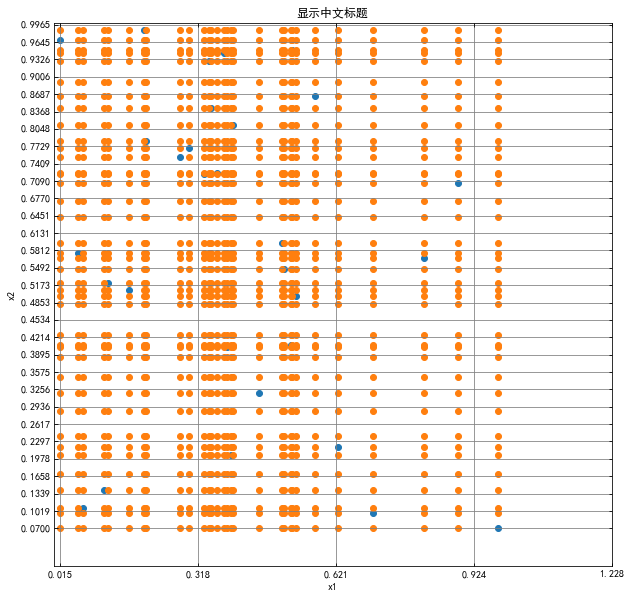

In [135]:
gen_x_cross = np.array(gen_x_cross)
plotting.plot_genx(X_train, gen_x_cross, length, n_sample, exp_config, fig_dir, xlimit)

In [136]:
XLim.xl_attri(xlim_list, X_train, gen_x_cross)
XLim.sample_attri(sample_list, X_train, gen_x_cross, Y_train)
XLim.add_xvalue(xlim_list)

In [137]:
import GPy

noise = 1
length_ = 1

run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=2, variance=noise, lengthscale=length_)
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel)
if run_hyperopt_search:
    gpr.optimize(messages=True) 

In [138]:
gen_y_cross, cov_train_cross = gpr.predict(np.array(gen_x_cross))

In [139]:
XLim.add_y(sample_list, gpr)
print("over")

over


In [140]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2960
Model:                       QuantReg   Bandwidth:                       1.146
Method:                 Least Squares   Sparsity:                        2.326
Date:                Wed, 02 Sep 2020   No. Observations:                   30
Time:                        10:39:29   Df Residuals:                       27
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5650      0.695      3.692      0.001       1.140       3.990
x1            -2.8775      0.796     -3.617      0.001      -4.510      -1.245
x2             0.0942      0.791      0.119      0.906      -1.528       1.717


In [141]:
quantiles = np.arange(.05, .96, .1)
quantiles = np.around(quantiles, decimals=3)
def fit_model(q):
    res = qr.fit(q=q)
    return q, np.around(res.params,decimals=  4)

models = []

for x in quantiles:
    q, param = fit_model(x)
    model = QrModels.QrModels(q, param[0], param[1:])
    models.append(model)

for model in models:
    print(str(model.q)+'\t'+str(model.a)+'\t'+str(model.param))

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
           
for ol in ols.params:
    print(str(ol))

 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning:invalid value encountered in less_equal
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.


0.05	1.5307	[-2.1743  0.736 ]
0.15	2.5677	[-3.2895  0.3183]
0.25	2.547	[-2.864   0.2543]
0.35	2.525	[-2.1032 -0.0023]
0.45	2.5091	[-2.1013  0.1458]
0.55	2.4922	[-0.7705  0.2478]
0.65	2.4692	[-0.5318  0.2228]
0.75	2.7868	[-0.4381 -0.1179]
0.85	3.899	[-1.086  -1.1141]
0.95	3.4968	[-0.731 -0.319]
2.442331164960009
-1.0846771586848056
0.09632890094793461


In [142]:
y_quantile = [0.691, 1.084, 1.592, 1.803, 2.194, 2.365, 2.440, 2.574, 2.670, 3.239]

In [143]:
vir_xpoint = []
vir_ypoint = []

In [145]:
import QRselection
import importlib
importlib.reload(QRselection)


QRselection.qr_selection(xlim_list, models, vir_xpoint, vir_ypoint,y_quantile, gen_x_cross, ols)

x1 No.0 gap


AttributeError: 'SampleCharacter' object has no attribute 'y_pre'

In [ ]:
plotting.plot_genx(X_train, gen_x_cross, np.array(vir_xpoint), length, n_sample)


